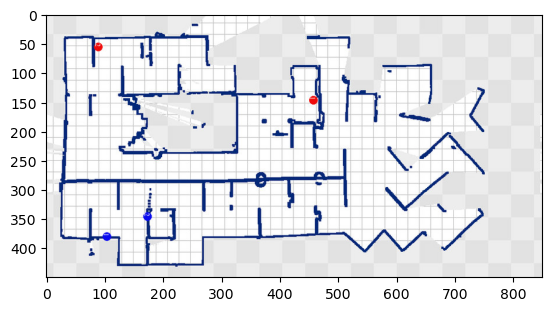

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://121.147.52.9:8016
Press CTRL+C to quit
218.149.140.52 - - [13/May/2024 14:35:39] "GET /to_flutter_map_data HTTP/1.1" 200 -
218.149.140.52 - - [13/May/2024 14:35:47] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 185, 'y좌표': 242}


218.149.140.52 - - [13/May/2024 14:35:48] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 14:35:58] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 189, 'y좌표': 492}


218.149.140.52 - - [13/May/2024 14:35:59] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 14:36:08] "POST /goToHome HTTP/1.1" 200 -


집 좌표 : {'x좌표': 190, 'y좌표': 550}


218.149.140.52 - - [13/May/2024 14:36:19] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 14:39:26] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 163, 'y좌표': 239}


218.149.140.52 - - [13/May/2024 14:39:27] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 14:39:28] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 287, 'y좌표': 426}


218.149.140.52 - - [13/May/2024 14:39:31] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 14:39:33] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 161, 'y좌표': 357}


218.149.140.52 - - [13/May/2024 14:39:35] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 15:18:33] "GET /to_flutter_map_data HTTP/1.1" 200 -
218.149.140.52 - - [13/May/2024 15:18:45] "GET /to_flutter_map_data HTTP/1.1" 200 -
218.149.140.52 - - [13/May/2024 15:18:52] "POST /goToHome HTTP/1.1" 200 -


집 좌표 : {'x좌표': 190, 'y좌표': 550}


218.149.140.52 - - [13/May/2024 15:18:52] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 15:19:00] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 156, 'y좌표': 144}


218.149.140.52 - - [13/May/2024 15:19:02] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 15:19:04] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 102, 'y좌표': 531}


218.149.140.52 - - [13/May/2024 15:19:06] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 15:19:15] "GET /to_flutter_map_data HTTP/1.1" 200 -
218.149.140.52 - - [13/May/2024 15:19:19] "POST /goToHome HTTP/1.1" 200 -


집 좌표 : {'x좌표': 190, 'y좌표': 550}


218.149.140.52 - - [13/May/2024 15:19:21] "POST /stop HTTP/1.1" 200 -


멈춰! stop


218.149.140.52 - - [13/May/2024 16:54:15] "GET /to_flutter_map_data HTTP/1.1" 200 -
218.149.140.52 - - [13/May/2024 16:54:17] "POST /destination HTTP/1.1" 200 -


목적지 : {'x좌표': 158, 'y좌표': 322}


218.149.140.52 - - [13/May/2024 16:54:21] "POST /stop HTTP/1.1" 200 -


멈춰! stop


In [41]:
from flask import Flask, request, jsonify, send_file
import matplotlib.pyplot as plt

app = Flask(__name__)

map_data = 'C:/Users/smhrd/Desktop/final_project/map.jpg' # 맵핑된 데이터
robot_location = None # 실시간 로봇 데이터
destination = None # app에서 찍은 위치 데이터
stop_moving = None # 멈춤 신호
coordinate = None # 목적지 좌표값

img_color = plt.imread(map_data)
plt.imshow(img_color)
plt.show()

######################################################################
# robot에서 지도데이터 보냄(robot -> server)
@app.route('/map_data', methods=['POST'])
def map_data():
    global map_data
    data = request.json
    map_data = data
    return f'Map data received successfully : ${map_data}'

# robot에서 받은 지도를 app에 보냄(server -> app)
@app.route('/to_flutter_map_data', methods=['GET'])
def to_flutter_map_data():
    map_data = 'C:/Users/smhrd/Desktop/final_project/map.jpg' # robot에서 받은 데이터
    if map_data:
        return send_file(map_data, mimetype='image/jpg')
    else:
        return 'No data available(map_data)'
######################################################################
######################################################################
######################################################################
# 실시간 robot위치 보냄(robot -> server)
@app.route('/robot_location', methods=['POST'])
def robot_location():
    global robot_location
    data = request.json
    robot_location = data
    return f'Robot location received successfully ${robot_location}'


# 실시간 robot위치 보냄(server -> app)
@app.route('/to_flutter_robot_location', methods=['POST']) 
def to_flutter_robot_location():
    global robot_location
    if robot_location:
        return jsonify(robot_location)
    else:
        return 'No data available(robot_location)'
######################################################################
######################################################################
######################################################################
# app에서 로봇위치 찍으면 그 좌표값을 robot에 보냄(app -> server)
@app.route('/destination', methods=['POST'])
def destination():
    global destination
    data = request.json
    destination = data
    print("목적지 :", destination)
    return f'destination received successfully ${destination}'

# app에서 로봇위치 찍으면 그 좌표값을 robot에 보냄(server -> robot)
@app.route('/to_robot_destination', methods=['POST'])
def to_robot_destination():
    global destination
    if destination:
        return jsonify(destination)
    else:
        return 'No data available(destination)'
######################################################################
######################################################################
######################################################################
# app에서 집으로 버튼 누르면 집으로 가도록 집 좌표값 보냄(app -> server)
@app.route('/goToHome', methods=['POST'])
def goToHome():
    global destination
    data = request.json
    destination = data
    print('집 좌표 :', destination)
    return f'home coordinate received successfully ${destination}'
######################################################################
######################################################################
######################################################################
# 주행 중, app에서 stop신호 보냄(app -> server)
@app.route('/stop', methods=['POST'])
def stop():
    global stop_moving
    data = request.json
    stop_moving = data
    print('멈춰!', stop_moving['stop_signal'])
    return f'Stop!! ${stop_moving}'

# 주행 중, app에서 stop신호 보냄(server -> robot)
@app.route('/to_robot_stop', methods=['POST'])
def to_robot_stop():
    global stop_moving
    if stop_moving:
        return jsonify(stop_moving)
    else:
        return 'No data available(stop_moving)'
######################################################################


if __name__ == '__main__':
    app.run(host='121.147.52.9', port=8016)